#20/07/2022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.metrics import confusion_matrix

In [ ]:
def read_csv_perceptron(filename):
  df=pd.read_csv(filename)
  x=df.drop('label', axis=1).to_numpy()
  y=df['label'].to_numpy()
  return x,y

In [ ]:
def add_bias(x):
  bias=np.ones(len(x)).reshape(-1, 1)
  return np.concatenate((bias, x), axis=1)

In [ ]:
def plot_scatter(x, y):
  plt.scatter(x[:, 0][y==0], x[:, 1][y==0], color='red')
  plt.scatter(x[:, 0][y==1], x[:, 1][y==1], color='blue')

In [ ]:
def predict(w, x_i):
  if np.dot(w, x_i)>0:
    return 1
  else:
    return 0

In [ ]:
def perceptron(x, y):
  w=np.zeros((3)).astype(float)
  while True:
    m=0
    for i in range(len(x)):
      x_i=x[i]
      y_i=y[i]
      pred=predict(w, x_i)
      error=y_i-pred
      w+=error*x_i
      if error!=0:
        m+=1
    if m==0:
      break
  return w

In [ ]:
def plot_boundary(w):
  bias=w[0]
  w1=w[1]
  w2=w[2]
  m=-(bias/w2)/(bias/w1)
  b=(-bias/w2)
  xx=np.linspace(-5, 20)
  yy=m*xx+1
  plt.plot(xx, yy, 'k-')

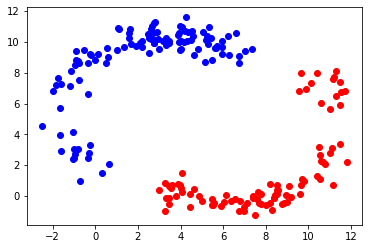

In [ ]:
#x, y=read_csv_perceptron('and_func.csv')
#x, y=read_csv_perceptron('or_func.csv')
x, y=read_csv_perceptron('xor_func.csv')
plot_scatter(x, y)

In [ ]:
x=add_bias(x)
x.shape

(200, 3)

In [ ]:
w=perceptron(x, y)
w

array([  1.        , -17.45288913,  20.61023794])

In [ ]:
y_pred=[]
for i in range(len(x)):
  pred=predict(w, x[i])
  y_pred.append(pred)
y_pred

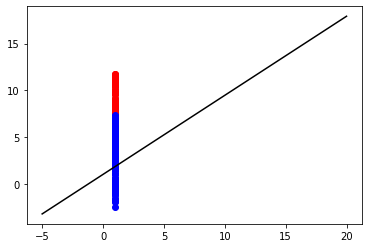

In [ ]:
plot_scatter(x, y)
plot_boundary(w)

In [ ]:
x_train, y_train=read_csv_perceptron('classification_train_data.csv')
x_test, y_test=read_csv_perceptron('classification_test_data.csv')
x_train.shape

(200, 2)

In [ ]:
x_test.shape

(100, 2)

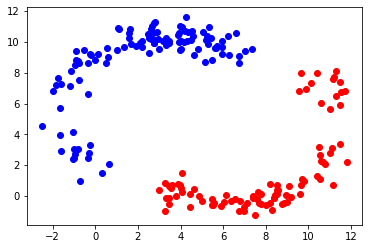

In [ ]:
plot_scatter(x_train, y_train)

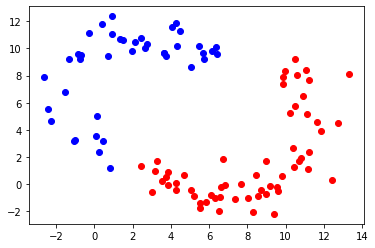

In [ ]:
plot_scatter(x_test, y_test)

In [ ]:
x_train1=add_bias(x_train)
x_train1.shape

(200, 3)

In [ ]:
x_test1=add_bias(x_test)
x_test1.shape

(100, 3)

In [ ]:
w1=perceptron(x_train1, y_train)
w1

array([  1.        , -17.45288913,  20.61023794])

In [ ]:
w2=perceptron(x_test1, y_test)
w2

array([  0.        , -14.3119043 ,  13.62595005])

In [ ]:
y_pred1=[]
for i in range(len(x_train1)):
  pred=predict(w, x[i])
  y_pred1.append(pred)
y_pred1

In [ ]:
y_pred2=[]
for i in range(len(x_test1)):
  pred=predict(w, x[i])
  y_pred2.append(pred)
y_pred2

[  1.         -17.45288913  20.61023794]


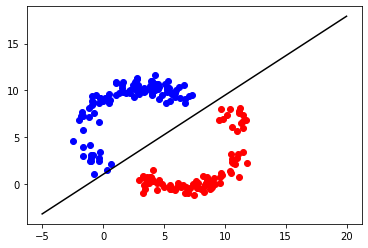

In [ ]:
print(w1)
plot_scatter(x_train, y_train)
plot_boundary(w1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_pred1, y_train))
print(accuracy_score(y_pred2, y_test))

1.0
0.44


In [ ]:
!pip install -q scikit-plot

In [ ]:
import scikitplot as skplt
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

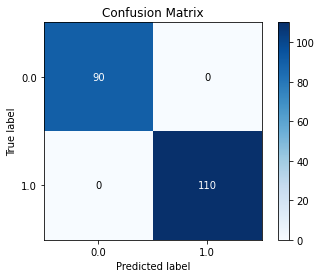

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, y_pred1)
plt.show()

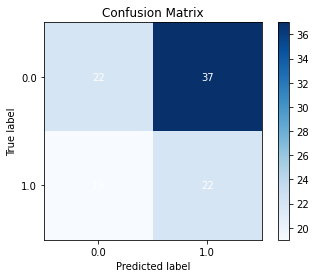

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred2)
plt.show()

MULTILAYER PERCEPTRON

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
input_features=x_train.shape[1]
output_units=1
hidden_units=4

In [ ]:
w1=np.random.normal(size=(hidden_units, input_features))
b1=np.ones((hidden_units, 1))
w2=np.random.normal(size=(output_units, hidden_units))

In [ ]:
z1=w1@x_train.T+b1
z1

array([[  7.74462197,   8.31298729,  -5.51467493,  -4.8807957 ,
         -6.95120489,  -4.39631753,  -5.54043787,   3.71390471,
          9.39162171,  -5.84568761,   8.73765605,  -5.17164246,
         -3.03325667,   4.53300256,  -2.40090048,  -7.20441415,
         -6.33706251,  10.136284  ,   8.7588094 ,   8.51222143,
          5.80354195,  -1.14086201,  -5.4409518 ,  -2.02597478,
         -8.08905647,  -4.0364607 ,  -0.53567457,   8.25813789,
         -5.27147448,  -6.55012837,  -6.45564735,   8.46554776,
         -5.08971041,   7.47509208,  -5.23092619,   6.87999342,
         -3.62058534,  -4.37684419,   8.59854493,  -3.36772406,
         -5.64569721,  -6.5151095 ,  -3.10384778,  -5.15016875,
          9.13527354,  -3.43348362,   4.31040865,  -7.88265074,
          4.16037547,   5.51843195,   8.60285932,  -4.8527018 ,
          5.6315224 ,  -1.7242191 ,   3.52764391,   4.0060277 ,
         -3.99249737,  -6.38665715,  -5.36482389,   3.71522483,
         -7.5815021 ,  -2.28558816,   8.

In [ ]:
z1_sig=sigmoid(z1)
z1_sig

array([[9.99567122e-01, 9.99754750e-01, 4.01108270e-03, 7.53378276e-03,
        9.56564909e-04, 1.21726352e-02, 3.90946402e-03, 9.76198207e-01,
        9.99916587e-01, 2.88400369e-03, 9.99839596e-01, 5.64321324e-03,
        4.59458601e-02, 9.89365944e-01, 8.31040560e-02, 7.42745447e-04,
        1.76636690e-03, 9.99960386e-01, 9.99842953e-01, 9.99799044e-01,
        9.96992224e-01, 2.42162131e-01, 4.31664074e-03, 1.16502598e-01,
        3.06785023e-04, 1.73534066e-02, 3.69194359e-01, 9.99740926e-01,
        5.10978796e-03, 1.42789024e-03, 1.56915544e-03, 9.99789444e-01,
        6.12209257e-03, 9.99433288e-01, 5.32011422e-03, 9.98972905e-01,
        2.60692094e-02, 1.24090299e-02, 9.99815660e-01, 3.33195376e-02,
        3.52024859e-03, 1.47870393e-03, 4.29488166e-02, 5.76499826e-03,
        9.99892216e-01, 3.12652487e-02, 9.86749863e-01, 3.77089538e-04,
        9.84637975e-01, 9.96003899e-01, 9.99816454e-01, 7.74677430e-03,
        9.96429677e-01, 1.51328515e-01, 9.71464170e-01, 9.821199

In [ ]:
z2=w2@z1_sig
z2

array([[-1.4018859 , -1.22724836, -0.10977149, -0.15608043, -0.08149368,
        -0.17928304, -0.12954404, -0.79220129, -1.18187559, -0.11201229,
        -1.19041389, -0.14085098, -0.27653072, -0.8884497 , -0.7181019 ,
        -0.10193256, -0.140453  , -1.20490709, -1.22338858, -1.18482405,
        -1.01662179, -0.38187351, -0.13188639, -0.34964468, -0.06708739,
        -0.17672622, -1.32892265, -1.16193065, -0.12581444, -0.08414163,
        -0.10751118, -1.24142883, -0.14814005, -1.22039211, -0.34769705,
        -1.28292299, -0.20960649, -0.17909081, -1.17040862, -0.23045552,
        -0.13184689, -0.08581014, -0.25144573, -0.21815848, -1.26593058,
        -0.22327175, -1.28816437, -0.07026957, -1.42135343, -1.49832127,
        -1.27337227, -0.16662322, -1.01274986, -0.79227107, -1.21317875,
        -1.41746364, -0.18576469, -0.10696845, -0.13889503, -1.19266731,
        -0.08360417, -0.79209657, -1.28570486, -0.08663492, -1.66040454,
        -0.10271488, -1.21933592, -0.10239747, -1.1

In [ ]:
def mse(predictions, labels):
  error=(predictions-labels)**2
  return np.mean(error)

In [ ]:
mse(z2, y_train)

1.5602880124978424

In [3]:
import pandas as pd
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x=df.drop(['Id', 'Species'], axis=1)
y=df['Species']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8372654150>,
      dtype=object)

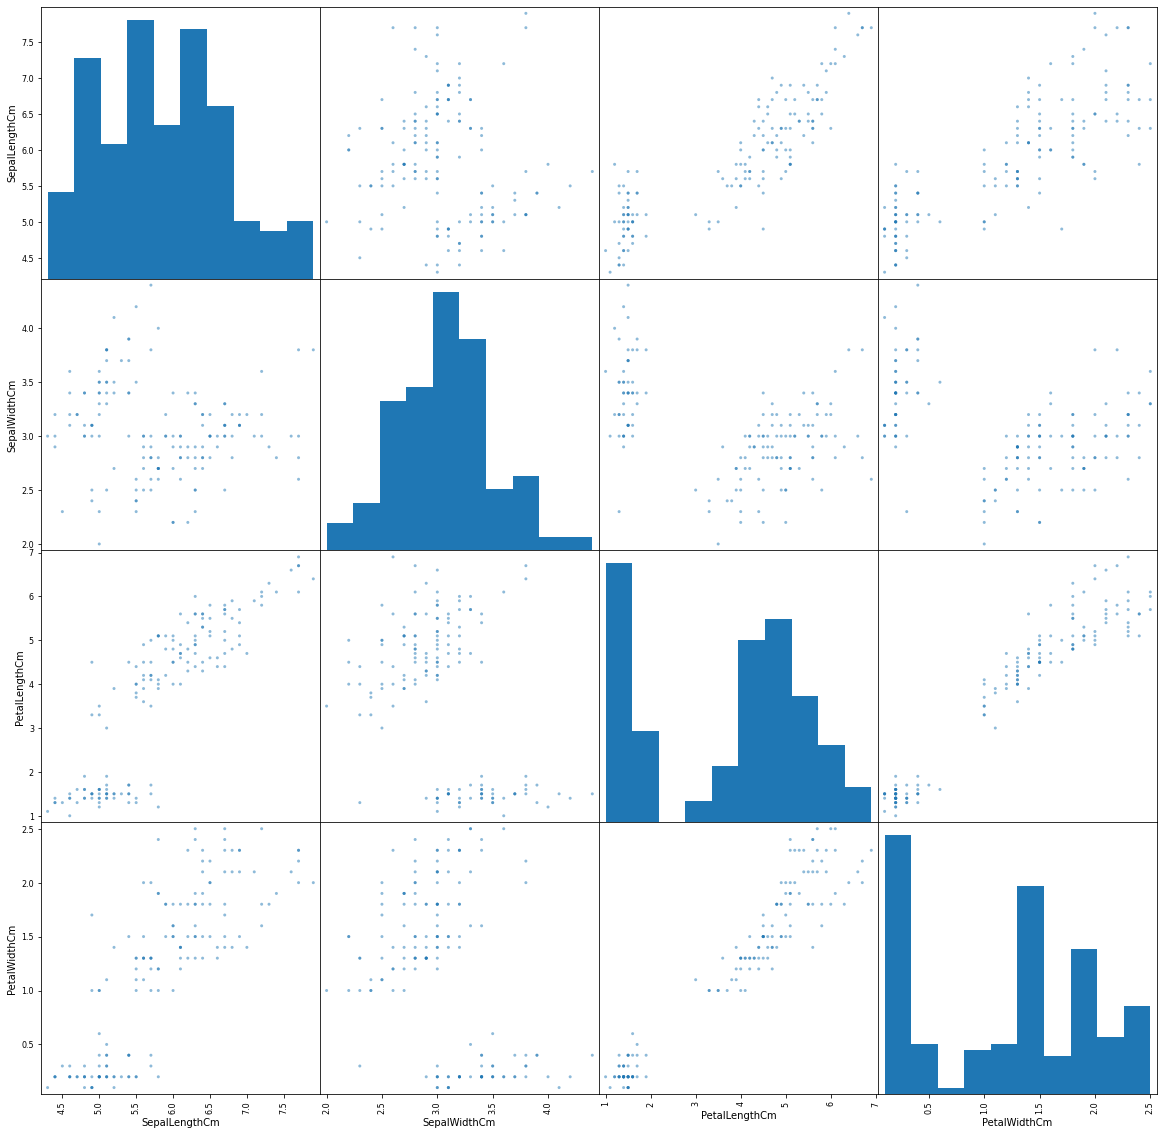

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(x, figsize=(20, 20))

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, stratify=y, random_state=3, test_size=0.2)

In [ ]:
# Apply decision tree, random forest, logistic regression and knn

In [7]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [8]:
# calculate accuracy, f1 score, precion-recall curve, roc_auc_curve
clf.predict(x_test)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

tensorflow playground